<a href="https://colab.research.google.com/github/anuragal/deep-learning/blob/master/S10/S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model

In [1]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install torchsummary
from torchsummary import summary

from models.resnet18 import ResNet18

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

## Run the Model

In [0]:
%matplotlib inline

In [3]:
import torch.nn as nn

from dataloader import ImageData
from models.resnet18 import ResNet18
from datamodel import DataModel
from optimizer import OptimizerFactory

from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load("albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

scheduler = ReduceLROnPlateau(optimizer, mode='min')

# training the dataset and then running test
dm = DataModel(img_data, criterion, optimizer, scheduler, num_of_epochs = 50, cal_misclassified = True)
dm.run_model(model, device)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3907268047332764 Batch_id=390 Accuracy=41.01: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0132, Accuracy: 5182/10000 (51.82%)

EPOCH: 2


Loss=1.1371922492980957 Batch_id=390 Accuracy=56.47: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 6119/10000 (61.19%)

EPOCH: 3


Loss=1.0881356000900269 Batch_id=390 Accuracy=63.98: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 5934/10000 (59.34%)

EPOCH: 4


Loss=0.7498782873153687 Batch_id=390 Accuracy=68.84: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 7067/10000 (70.67%)

EPOCH: 5


Loss=0.7266486883163452 Batch_id=390 Accuracy=72.05: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 7369/10000 (73.69%)

EPOCH: 6


Loss=0.7145856022834778 Batch_id=390 Accuracy=74.96: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 7492/10000 (74.92%)

EPOCH: 7


Loss=0.5644903182983398 Batch_id=390 Accuracy=77.12: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7667/10000 (76.67%)

EPOCH: 8


Loss=0.6898112297058105 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 7614/10000 (76.14%)

EPOCH: 9


Loss=0.5880159139633179 Batch_id=390 Accuracy=79.97: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7969/10000 (79.69%)

EPOCH: 10


Loss=0.6522901058197021 Batch_id=390 Accuracy=81.63: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8060/10000 (80.60%)

EPOCH: 11


Loss=0.6039943695068359 Batch_id=390 Accuracy=82.23: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8130/10000 (81.30%)

EPOCH: 12


Loss=0.5458175539970398 Batch_id=390 Accuracy=83.58: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8066/10000 (80.66%)

EPOCH: 13


Loss=0.4442005157470703 Batch_id=390 Accuracy=84.65: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8064/10000 (80.64%)

EPOCH: 14


Loss=0.34880930185317993 Batch_id=390 Accuracy=85.09: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8334/10000 (83.34%)

EPOCH: 15


Loss=0.2919448912143707 Batch_id=390 Accuracy=86.17: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8030/10000 (80.30%)

EPOCH: 16


Loss=0.3534368872642517 Batch_id=390 Accuracy=86.88: 100%|██████████| 391/391 [00:30<00:00, 12.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8329/10000 (83.29%)

EPOCH: 17


Loss=0.2789559066295624 Batch_id=390 Accuracy=87.41: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8434/10000 (84.34%)

EPOCH: 18


Loss=0.28447145223617554 Batch_id=390 Accuracy=87.98: 100%|██████████| 391/391 [00:30<00:00, 12.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8281/10000 (82.81%)

EPOCH: 19


Loss=0.27861958742141724 Batch_id=390 Accuracy=88.71: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8417/10000 (84.17%)

EPOCH: 20


Loss=0.292110800743103 Batch_id=390 Accuracy=89.65: 100%|██████████| 391/391 [00:30<00:00, 12.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8344/10000 (83.44%)

EPOCH: 21


Loss=0.20864884555339813 Batch_id=390 Accuracy=89.82: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8402/10000 (84.02%)

EPOCH: 22


Loss=0.40658316016197205 Batch_id=390 Accuracy=90.27: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8397/10000 (83.97%)

EPOCH: 23


Loss=0.21812160313129425 Batch_id=390 Accuracy=90.72: 100%|██████████| 391/391 [00:30<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8544/10000 (85.44%)

EPOCH: 24


Loss=0.2965795397758484 Batch_id=390 Accuracy=91.24: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8398/10000 (83.98%)

EPOCH: 25


Loss=0.3212824761867523 Batch_id=390 Accuracy=91.45: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8397/10000 (83.97%)

EPOCH: 26


Loss=0.27709969878196716 Batch_id=390 Accuracy=91.98: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8545/10000 (85.45%)

EPOCH: 27


Loss=0.24285197257995605 Batch_id=390 Accuracy=92.22: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8556/10000 (85.56%)

EPOCH: 28


Loss=0.2611691355705261 Batch_id=390 Accuracy=92.65: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8429/10000 (84.29%)

EPOCH: 29


Loss=0.14077262580394745 Batch_id=390 Accuracy=93.02: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8579/10000 (85.79%)

EPOCH: 30


Loss=0.14900365471839905 Batch_id=390 Accuracy=93.18: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 8419/10000 (84.19%)

EPOCH: 31


Loss=0.3172072470188141 Batch_id=390 Accuracy=93.36: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8547/10000 (85.47%)

EPOCH: 32


Loss=0.2469100058078766 Batch_id=390 Accuracy=93.55: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8570/10000 (85.70%)

EPOCH: 33


Loss=0.14885379374027252 Batch_id=390 Accuracy=93.90: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8464/10000 (84.64%)

EPOCH: 34


Loss=0.1834213137626648 Batch_id=390 Accuracy=93.87: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8511/10000 (85.11%)

EPOCH: 35


Loss=0.1828925609588623 Batch_id=390 Accuracy=95.95: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8814/10000 (88.14%)

EPOCH: 36


Loss=0.12694023549556732 Batch_id=390 Accuracy=96.48: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8828/10000 (88.28%)

EPOCH: 37


Loss=0.10273774713277817 Batch_id=390 Accuracy=96.48: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8841/10000 (88.41%)

EPOCH: 38


Loss=0.2529025077819824 Batch_id=390 Accuracy=96.70: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8839/10000 (88.39%)

EPOCH: 39


Loss=0.15220732986927032 Batch_id=390 Accuracy=96.86: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8832/10000 (88.32%)

EPOCH: 40


Loss=0.14451108872890472 Batch_id=390 Accuracy=96.99: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8862/10000 (88.62%)

EPOCH: 41


Loss=0.08876143395900726 Batch_id=390 Accuracy=97.09: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8851/10000 (88.51%)

EPOCH: 42


Loss=0.02438836731016636 Batch_id=390 Accuracy=96.99: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8850/10000 (88.50%)

EPOCH: 43


Loss=0.12480078637599945 Batch_id=390 Accuracy=97.16: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8840/10000 (88.40%)

EPOCH: 44


Loss=0.11682188510894775 Batch_id=390 Accuracy=97.31: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8864/10000 (88.64%)

EPOCH: 45


Loss=0.13206636905670166 Batch_id=390 Accuracy=97.27: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8834/10000 (88.34%)

EPOCH: 46


Loss=0.09407088160514832 Batch_id=390 Accuracy=97.29: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8840/10000 (88.40%)

EPOCH: 47


Loss=0.11185978353023529 Batch_id=390 Accuracy=97.28: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8865/10000 (88.65%)

EPOCH: 48


Loss=0.04608024284243584 Batch_id=390 Accuracy=97.32: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8860/10000 (88.60%)

EPOCH: 49


Loss=0.12006566673517227 Batch_id=390 Accuracy=97.37: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8863/10000 (88.63%)

EPOCH: 50


Loss=0.06717976927757263 Batch_id=390 Accuracy=97.45: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]



Test set: Average loss: 0.0039, Accuracy: 8868/10000 (88.68%)



## Plotting Test & Train Accuracy

[41.012, 56.474, 63.984, 68.844, 72.052, 74.956, 77.118, 78.748, 79.972, 81.628, 82.228, 83.584, 84.648, 85.094, 86.17, 86.88, 87.412, 87.982, 88.714, 89.652, 89.818, 90.268, 90.72, 91.244, 91.448, 91.982, 92.218, 92.652, 93.024, 93.18, 93.356, 93.546, 93.9, 93.87, 95.95, 96.476, 96.476, 96.698, 96.864, 96.992, 97.086, 96.992, 97.16, 97.31, 97.272, 97.292, 97.28, 97.316, 97.368, 97.448]
[51.82, 61.19, 59.34, 70.67, 73.69, 74.92, 76.67, 76.14, 79.69, 80.6, 81.3, 80.66, 80.64, 83.34, 80.3, 83.29, 84.34, 82.81, 84.17, 83.44, 84.02, 83.97, 85.44, 83.98, 83.97, 85.45, 85.56, 84.29, 85.79, 84.19, 85.47, 85.7, 84.64, 85.11, 88.14, 88.28, 88.41, 88.39, 88.32, 88.62, 88.51, 88.5, 88.4, 88.64, 88.34, 88.4, 88.65, 88.6, 88.63, 88.68]


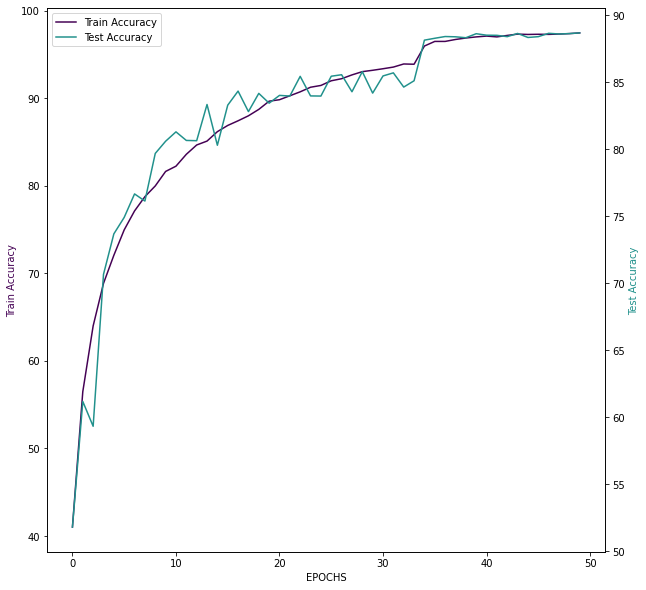

In [4]:
dm.plot_test_train_accuracy()

## Plotting Validation Accuracy

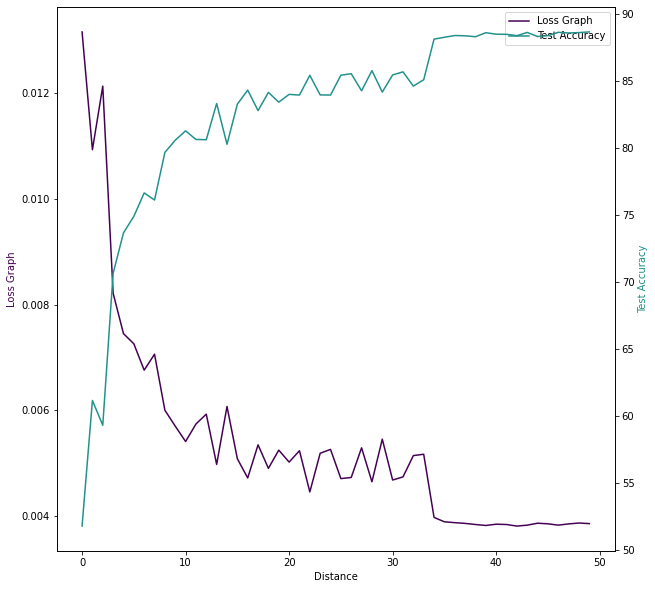

In [5]:
dm.plot_loss_accuracy()

## Plotting Misclassified Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

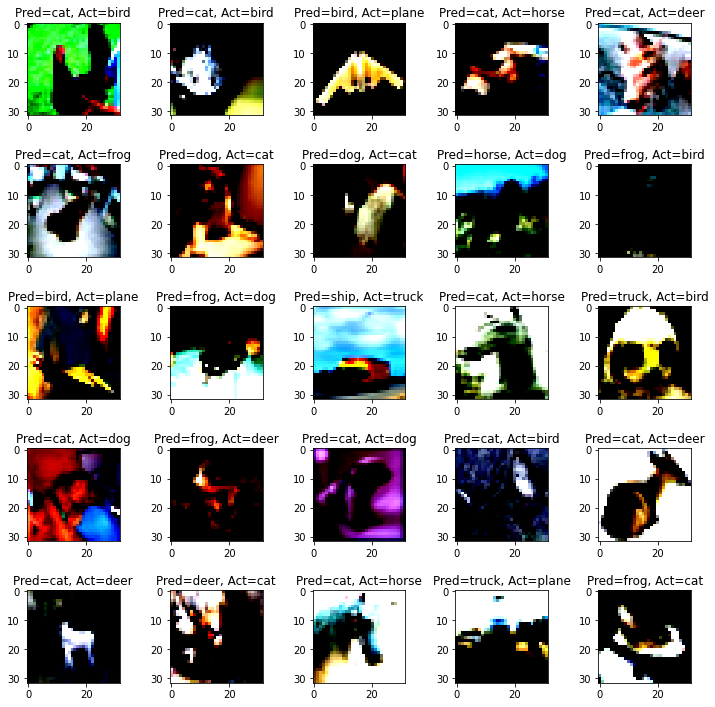

In [6]:
dm.plot_misclassified()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

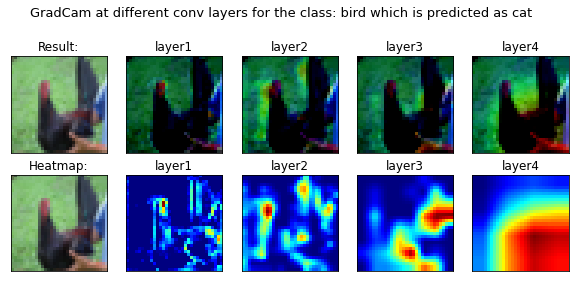

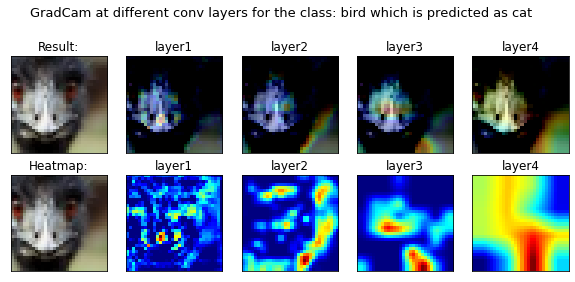

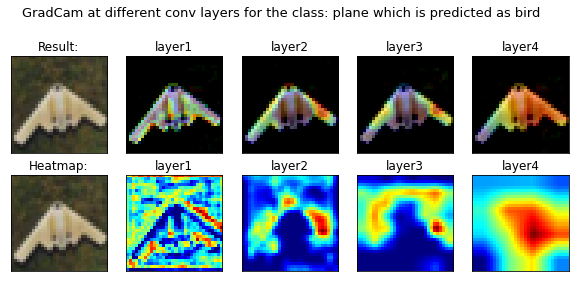

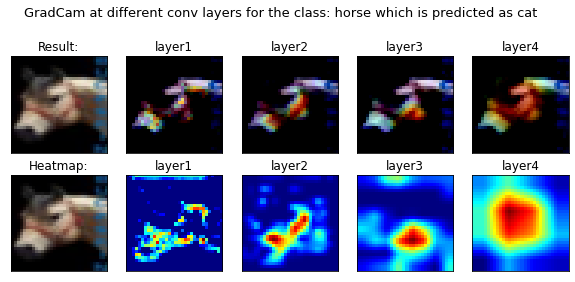

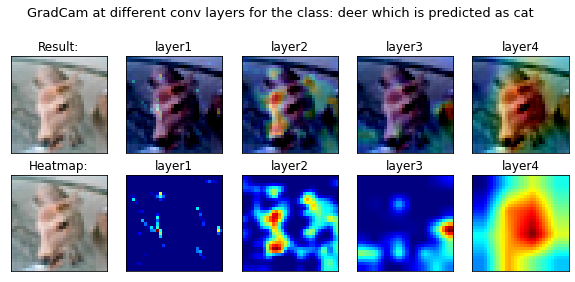

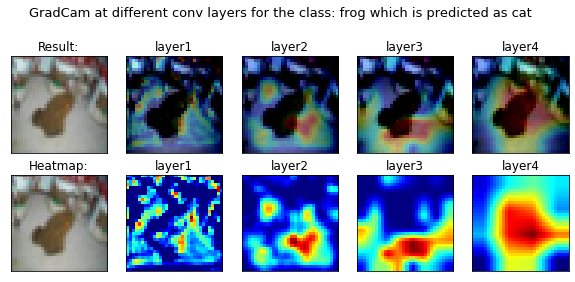

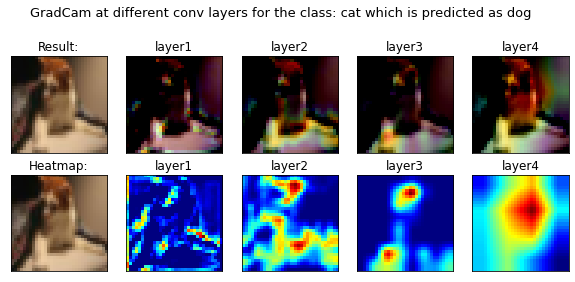

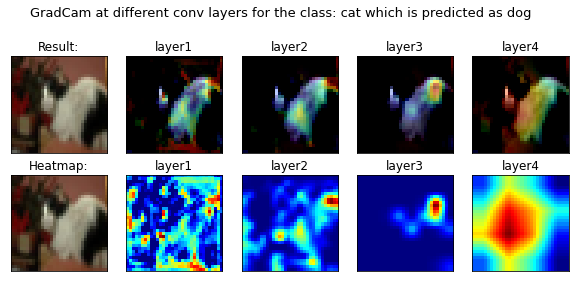

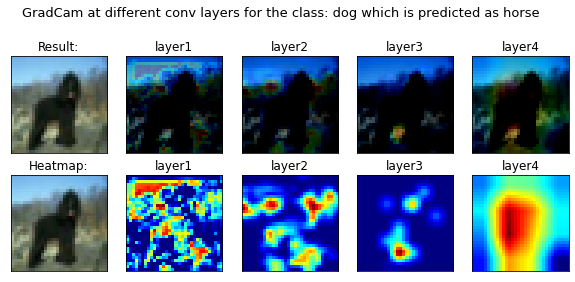

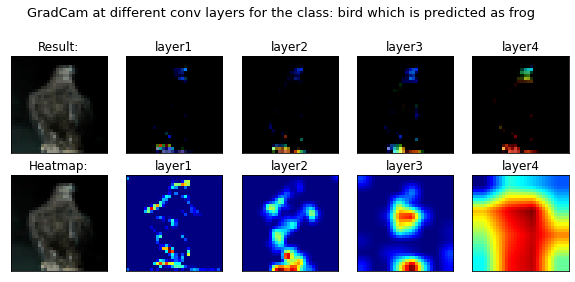

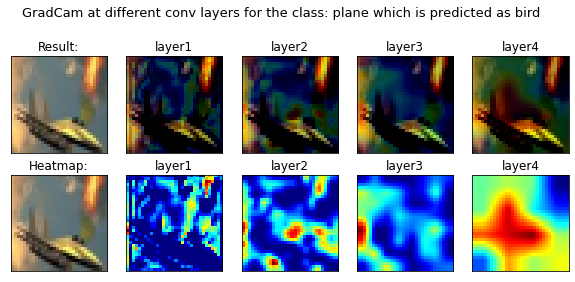

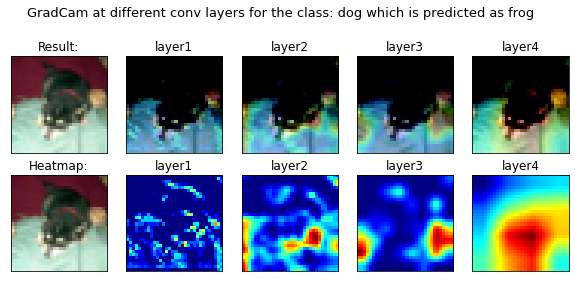

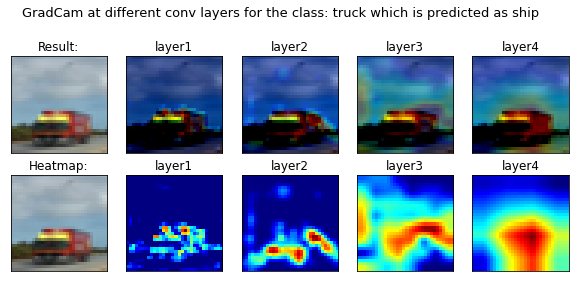

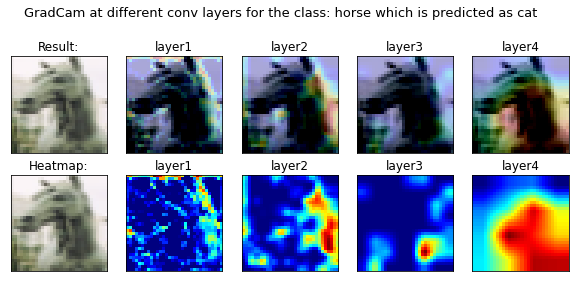

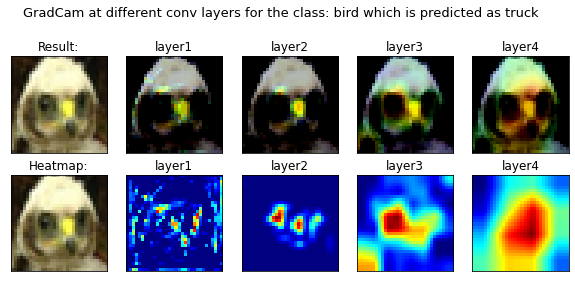

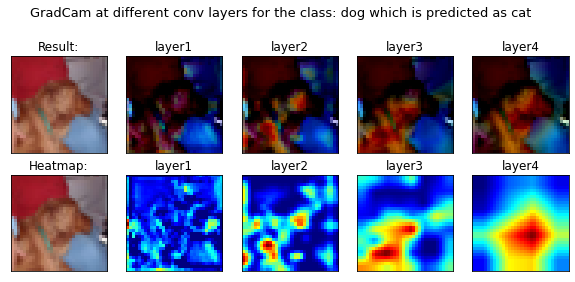

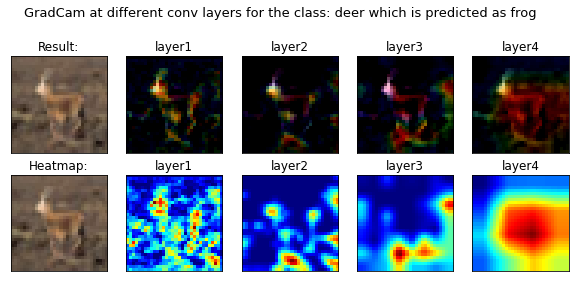

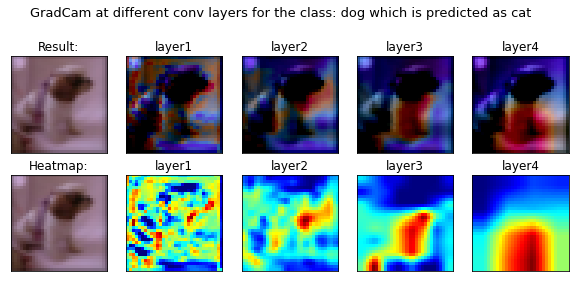

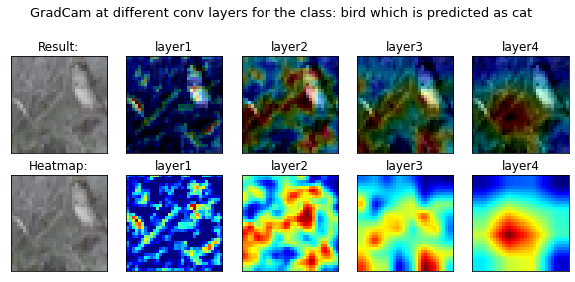

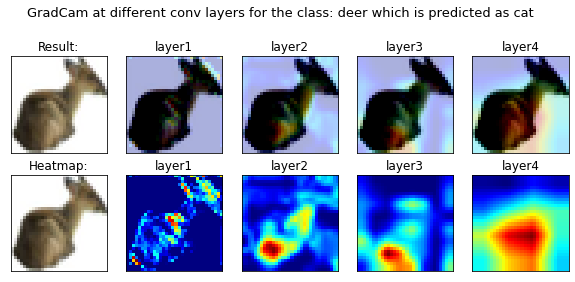

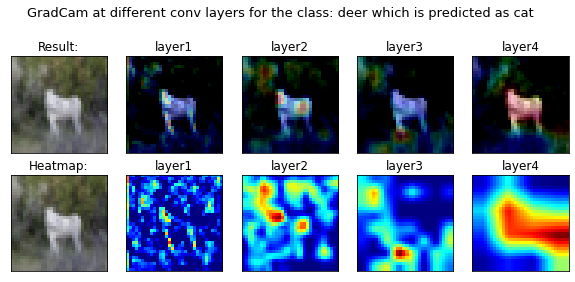

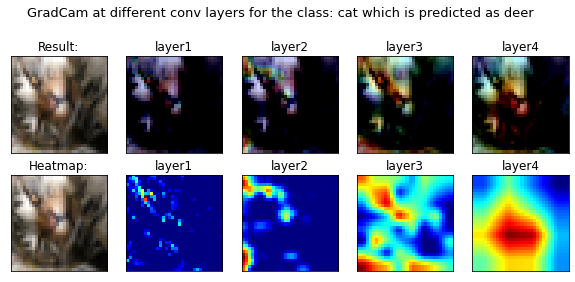

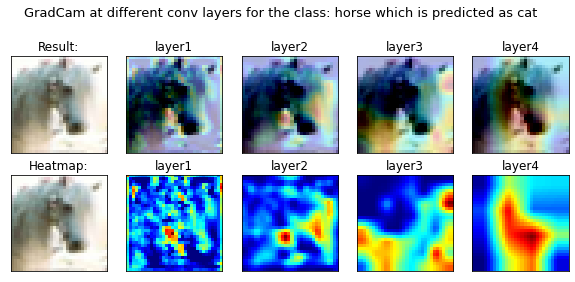

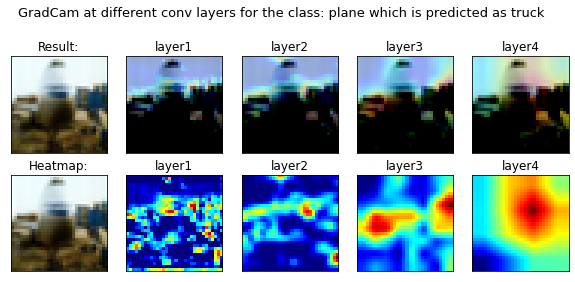

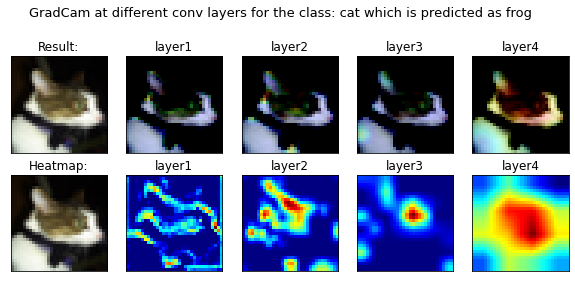

In [7]:
dm.plot_GRADcam(["layer1","layer2","layer3","layer4"])

## Plot LR FInder

  pip install torch-lr-finder -v --global-option="amp"



Learning rate search finished. See the graph with {finder_name}.plot()


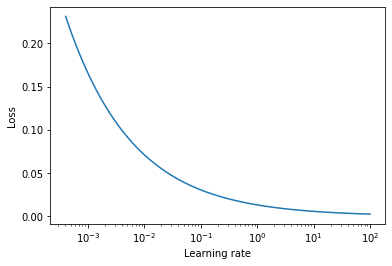

In [8]:
from lrfinder import LRFinder

lr_finder = LRFinder(model, optimizer, criterion, device)
lr_finder.range_test(img_data.trainloader, val_loader=img_data.testloader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot(skip_end=0)
